# Modelling

# Classification of Click

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 999)
verbose = 4
random_state=7
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [2]:
#filename = '/Users/viswanathravindran/AVDatahack/ADClick/ProData/ClassifierTrain2.csv'
#Traindf = pd.read_csv(filename)
Traindf = pd.read_csv('/prodata/ClassifierTrain2.csv')
#yfile = '/Users/viswanathravindran/AVDatahack/ADClick/ProData/All_y2.csv'
#All_y = pd.read_csv(yfile)
All_y = pd.read_csv('/prodata/All_y2.csv')

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print ('Before One hit encoding', Traindf.shape, All_y.shape)

Before One hit encoding (5500000, 17) (5500000, 4)


In [4]:
# Convert TrafficType, Browser, OS, Weekday, Dayhour into Numerical
Traindf = pd.get_dummies(Traindf, columns=['TrafficType','DayPeriod','Country','CountryFrd','Carrier','CarrierFrd',
                                           'Device', 'DeviceFrd', 'Browser', 'BrowserFrd', 'AdvCampaign',
                                           'AdvCampaignFrd', 'AndroidOS', 'IPClass'], drop_first=True)
print ('After One hot encoding',Traindf.shape, All_y.shape)

After One hot encoding (5500000, 201) (5500000, 4)


In [6]:
Traindf.head()

,ID,RefererUrl,Fraud,TrafficType_M,DayPeriod_FriAM2,DayPeriod_FriAM3,DayPeriod_FriAM4,DayPeriod_FriPM1,DayPeriod_FriPM2,DayPeriod_FriPM3,DayPeriod_FriPM4,DayPeriod_MonAM1,DayPeriod_MonAM2,DayPeriod_MonAM3,DayPeriod_MonAM4,DayPeriod_MonPM1,DayPeriod_MonPM2,DayPeriod_MonPM3,DayPeriod_MonPM4,DayPeriod_SatAM1,DayPeriod_SatAM2,DayPeriod_SatAM3,DayPeriod_SatAM4,DayPeriod_SatPM1,DayPeriod_SatPM2,DayPeriod_SatPM3,DayPeriod_SatPM4,DayPeriod_SunAM1,DayPeriod_SunAM2,DayPeriod_SunAM3,DayPeriod_SunAM4,DayPeriod_SunPM1,DayPeriod_SunPM2,DayPeriod_SunPM3,DayPeriod_SunPM4,DayPeriod_ThrAM1,DayPeriod_ThrAM2,DayPeriod_ThrAM3,DayPeriod_ThrAM4,DayPeriod_ThrPM1,DayPeriod_ThrPM2,DayPeriod_ThrPM3,DayPeriod_ThrPM4,DayPeriod_TueAM1,DayPeriod_TueAM2,DayPeriod_TueAM3,DayPeriod_TueAM4,DayPeriod_TuePM1,DayPeriod_TuePM2,...,AdvCampaign_ADCM13,AdvCampaign_ADCM14,AdvCampaign_ADCM15,AdvCampaign_ADCM16,AdvCampaign_ADCM17,AdvCampaign_ADCM18,AdvCampaign_ADCM19,AdvCampaign_ADCM2,AdvCampaign_ADCM20,AdvCampaign_ADCM21,AdvCampaign_ADCM22,AdvCampaign_ADCM23,AdvCampaign_ADCM24,AdvCampaign_ADCM25,AdvCampaign_ADCM26,AdvCampaign_ADCM27,AdvCampaign_ADCM28,AdvCampaign_ADCM29,AdvCampaign_ADCM3,AdvCampaign_ADCM30,AdvCampaign_ADCM31,AdvCampaign_ADCM32,AdvCampaign_ADCM33,AdvCampaign_ADCM34,AdvCampaign_ADCM35,AdvCampaign_ADCM36,AdvCampaign_ADCM37,AdvCampaign_ADCM38,AdvCampaign_ADCM39,AdvCampaign_ADCM4,AdvCampaign_ADCM40,AdvCampaign_ADCM41,AdvCampaign_ADCM42,AdvCampaign_ADCM43,AdvCampaign_ADCM44,AdvCampaign_ADCM45,AdvCampaign_ADCM5,AdvCampaign_ADCM6,AdvCampaign_ADCM7,AdvCampaign_ADCM8,AdvCampaign_ADCM9,AdvCampaign_ADCMOT,AdvCampaignFrd_L,AdvCampaignFrd_M,AdvCampaignFrd_VH,AndroidOS_yes,IPClass_ClassB,IPClass_ClassC,IPClass_ClassE
0,60317302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,57103822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,30999692,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,59559116,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
4,17487057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [5]:
y = All_y['ConversionStatus'].as_matrix().astype(np.int)
del All_y
y.shape

(5500000,)

In [10]:
#del NTraindf,X_train, X_test, y_train, y_test, X

In [6]:
# creating X
NTraindf = Traindf.iloc[:, 1:]
X = NTraindf.as_matrix().astype(np.int)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
NTraindf.head()

,RefererUrl,Fraud,TrafficType_M,DayPeriod_FriAM2,DayPeriod_FriAM3,DayPeriod_FriAM4,DayPeriod_FriPM1,DayPeriod_FriPM2,DayPeriod_FriPM3,DayPeriod_FriPM4,DayPeriod_MonAM1,DayPeriod_MonAM2,DayPeriod_MonAM3,DayPeriod_MonAM4,DayPeriod_MonPM1,DayPeriod_MonPM2,DayPeriod_MonPM3,DayPeriod_MonPM4,DayPeriod_SatAM1,DayPeriod_SatAM2,DayPeriod_SatAM3,DayPeriod_SatAM4,DayPeriod_SatPM1,DayPeriod_SatPM2,DayPeriod_SatPM3,DayPeriod_SatPM4,DayPeriod_SunAM1,DayPeriod_SunAM2,DayPeriod_SunAM3,DayPeriod_SunAM4,DayPeriod_SunPM1,DayPeriod_SunPM2,DayPeriod_SunPM3,DayPeriod_SunPM4,DayPeriod_ThrAM1,DayPeriod_ThrAM2,DayPeriod_ThrAM3,DayPeriod_ThrAM4,DayPeriod_ThrPM1,DayPeriod_ThrPM2,DayPeriod_ThrPM3,DayPeriod_ThrPM4,DayPeriod_TueAM1,DayPeriod_TueAM2,DayPeriod_TueAM3,DayPeriod_TueAM4,DayPeriod_TuePM1,DayPeriod_TuePM2,DayPeriod_TuePM3,...,AdvCampaign_ADCM13,AdvCampaign_ADCM14,AdvCampaign_ADCM15,AdvCampaign_ADCM16,AdvCampaign_ADCM17,AdvCampaign_ADCM18,AdvCampaign_ADCM19,AdvCampaign_ADCM2,AdvCampaign_ADCM20,AdvCampaign_ADCM21,AdvCampaign_ADCM22,AdvCampaign_ADCM23,AdvCampaign_ADCM24,AdvCampaign_ADCM25,AdvCampaign_ADCM26,AdvCampaign_ADCM27,AdvCampaign_ADCM28,AdvCampaign_ADCM29,AdvCampaign_ADCM3,AdvCampaign_ADCM30,AdvCampaign_ADCM31,AdvCampaign_ADCM32,AdvCampaign_ADCM33,AdvCampaign_ADCM34,AdvCampaign_ADCM35,AdvCampaign_ADCM36,AdvCampaign_ADCM37,AdvCampaign_ADCM38,AdvCampaign_ADCM39,AdvCampaign_ADCM4,AdvCampaign_ADCM40,AdvCampaign_ADCM41,AdvCampaign_ADCM42,AdvCampaign_ADCM43,AdvCampaign_ADCM44,AdvCampaign_ADCM45,AdvCampaign_ADCM5,AdvCampaign_ADCM6,AdvCampaign_ADCM7,AdvCampaign_ADCM8,AdvCampaign_ADCM9,AdvCampaign_ADCMOT,AdvCampaignFrd_L,AdvCampaignFrd_M,AdvCampaignFrd_VH,AndroidOS_yes,IPClass_ClassB,IPClass_ClassC,IPClass_ClassE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [12]:
print ('The shape of X is:',X.shape, 'The shape of y is', y.shape)

The shape of X is: (5500000, 200) The shape of y is (5500000,)


In [13]:
np.bincount(y)

array([5000000,  500000])

In [8]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn import tree
import graphviz
#from xgboost import XGBClassifier
#from xgboost.sklearn import XGBClassifier

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=random_state)

In [10]:
y_actu = pd.Series(y_test, name='Actual')
clf1 = ensemble.RandomForestClassifier(verbose=verbose,random_state=random_state,n_jobs=-1)
clf1 = clf1.fit(X_train, y_train)
rfpred = pd.Series(clf1.predict(X_test), name='Predicted')
RF_confusion = pd.crosstab(y_test, rfpred)
print (RF_confusion)

building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 1 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.0min remaining:   41.7s


building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.8s finished


Predicted        0       1
row_0                     
0          1467117   32502
1            50077  100304


In [14]:
#y_actu = pd.Series(yTrain, name='Actual')
#clf2 = XGBClassifier(seed=random_state,objective='binary:logistic',booster='gbtree',silent=0,
#                     nthread=8,eval_metric='logloss')
#clf2 = clf2.fit(X_train, y_train)
#xgpred = pd.Series(clf2.predict(X_test), name='Predicted')
#XG_confusion = pd.crosstab(y_actu, xgpred)
#print (XG_confusion)

Predicted      0.0   1.0
Actual                  
0          1644801  5199


In [17]:
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y_test, rfpred)))
#print('XG Boost Classifier:\n {}\n'.format(metrics.classification_report(y_test, xgpred)))

Random Forest Classifier:
              precision    recall  f1-score   support

          0       0.97      0.98      0.97   1499619
          1       0.76      0.67      0.71    150381

avg / total       0.95      0.95      0.95   1650000




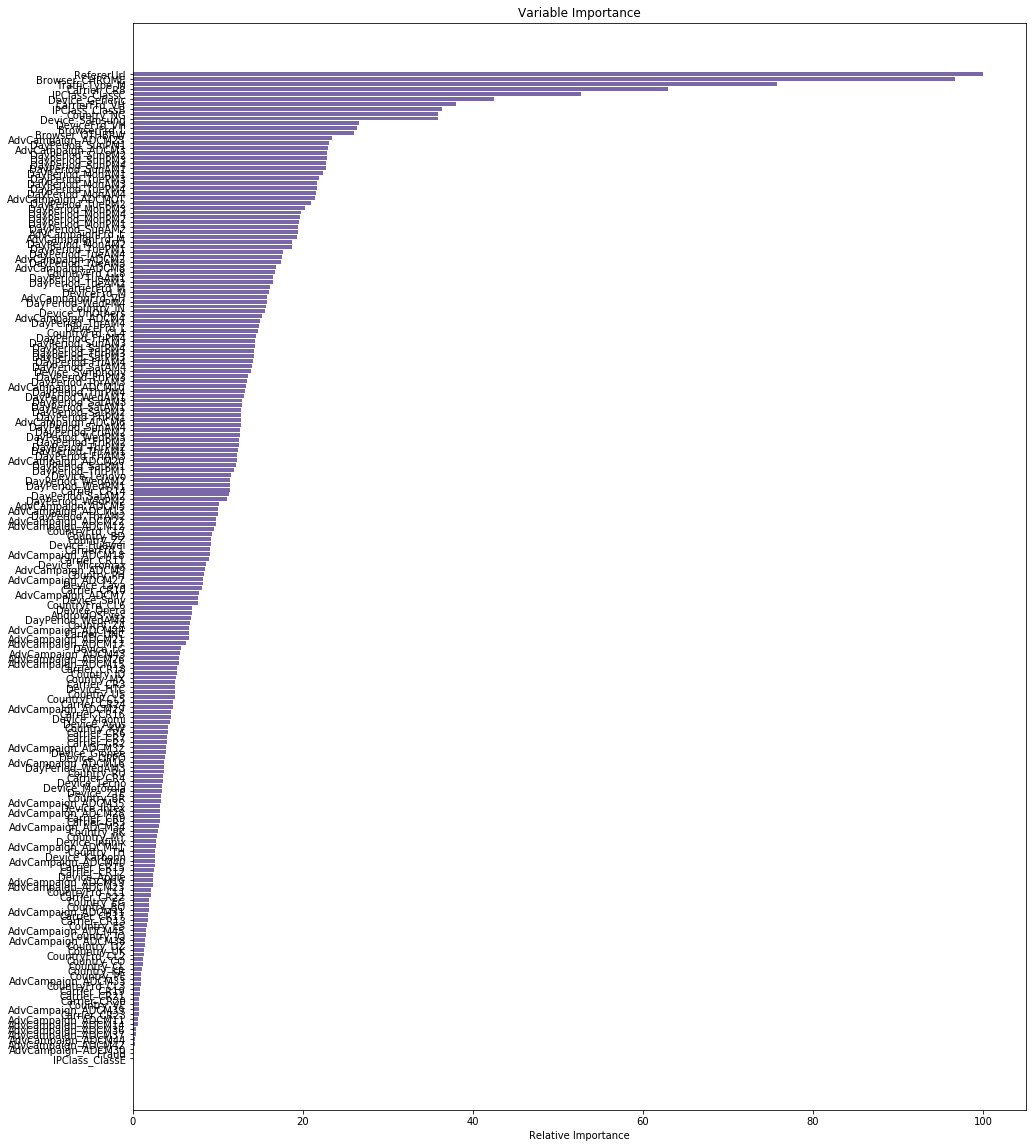

In [18]:
# Get Feature Importance from the classifier
feature_importance = clf1.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(NTraindf.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [9]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(NTraindf.columns, clf1.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=False)
importances = importances.iloc[0:100, :]
importances = importances.T

In [11]:
importances.to_csv('importances.csv')

In [105]:
importances

,RefererUrl,Browser_CHROME,TrafficType_M,Carrier_CR8,IPClass_ClassC,Device_Generic,CarrierFrd_VH,IPClass_ClassB,Country_NG,Device_Samsung,DeviceFrd_VH,BrowserFrd_L,Browser_OTHBRW,AdvCampaign_ADCM25,DayPeriod_SunPM1,AdvCampaign_ADCM3,DayPeriod_SunPM2,DayPeriod_SunPM3,DayPeriod_SunPM4,DayPeriod_SunAM1,DayPeriod_MonAM1,DayPeriod_TuePM3,DayPeriod_MonAM3,DayPeriod_TuePM4,DayPeriod_MonAM4,AdvCampaign_ADCMOT,DayPeriod_TuePM2,DayPeriod_MonPM3,DayPeriod_MonPM4,DayPeriod_MonPM2,DayPeriod_MonPM1,DayPeriod_SunAM2,AdvCampaignFrd_L,AdvCampaignFrd_M,DayPeriod_MonAM2,DayPeriod_TuePM1,DayPeriod_TueAM4,AdvCampaign_ADCM2,DayPeriod_TueAM3,AdvCampaign_ADCM8,CountryFrd_CL8,DayPeriod_TueAM1,DayPeriod_TueAM2,CarrierFrd_M,DeviceFrd_M,AdvCampaignFrd_VH,DayPeriod_WedPM4,Country_IN,Device_UnOthers,...,DeviceFrd_L,CountryFrd_CL4,DayPeriod_FriPM4,DayPeriod_SunAM3,DayPeriod_SatPM4,DayPeriod_ThrPM3,DayPeriod_SatPM3,DayPeriod_FriAM4,DayPeriod_SatAM4,Device_Symphony,DayPeriod_FriPM3,DayPeriod_ThrAM3,AdvCampaign_ADCM10,DayPeriod_ThrPM4,DayPeriod_WedAM1,DayPeriod_SatAM3,DayPeriod_SatAM1,DayPeriod_SatPM2,DayPeriod_FriPM1,AdvCampaign_ADCM6,DayPeriod_SunAM4,DayPeriod_FriAM2,DayPeriod_WedPM3,DayPeriod_FriPM2,DayPeriod_ThrPM2,DayPeriod_ThrAM1,DayPeriod_FriAM3,AdvCampaign_ADCM20,DayPeriod_SatPM1,DayPeriod_ThrPM1,Device_Lenovo,DayPeriod_WedAM2,DayPeriod_WedPM1,Carrier_CR14,DayPeriod_SatAM2,DayPeriod_WedPM2,AdvCampaign_ADCM5,AdvCampaign_ADCM13,DayPeriod_ThrAM2,AdvCampaign_ADCM22,AdvCampaign_ADCM12,CountryFrd_CL7,Country_BD,Country_ZZ,Device_Huawei,CarrierFrd_L,AdvCampaign_ADCM18,Carrier_CR11,Device_Micromax
Gini-importance,0.043143,0.041697,0.032688,0.027133,0.02274,0.018302,0.016408,0.015674,0.015502,0.015494,0.011483,0.011389,0.011203,0.01011,0.009946,0.009909,0.009844,0.009834,0.009821,0.00978,0.009634,0.009471,0.009351,0.009347,0.009299,0.009266,0.009041,0.008747,0.008551,0.008481,0.008439,0.008398,0.008375,0.008312,0.0081,0.008053,0.007631,0.007557,0.007495,0.007283,0.007225,0.007128,0.007127,0.006938,0.006913,0.006828,0.006824,0.006753,0.006707,...,0.006404,0.006373,0.006273,0.006207,0.006195,0.006156,0.006145,0.006087,0.006056,0.006016,0.005868,0.005776,0.005745,0.005712,0.00565,0.005531,0.005522,0.005512,0.0055,0.005497,0.005495,0.005458,0.005423,0.005401,0.005365,0.005342,0.005274,0.005266,0.005235,0.005116,0.004961,0.00493,0.00491,0.004907,0.004865,0.0048,0.004359,0.004327,0.004301,0.004235,0.004214,0.004108,0.004034,0.00397,0.003958,0.00392,0.003915,0.003857,0.003724


In [106]:
cols = list(importances.columns.values)

In [107]:
len(cols)

100

In [109]:
NTraindf1 = Traindf[cols]
X = NTraindf1.as_matrix().astype(np.int)
print(X.shape)

(5500000, 100)


In [110]:
NTraindf1.head()

,RefererUrl,Browser_CHROME,TrafficType_M,Carrier_CR8,IPClass_ClassC,Device_Generic,CarrierFrd_VH,IPClass_ClassB,Country_NG,Device_Samsung,DeviceFrd_VH,BrowserFrd_L,Browser_OTHBRW,AdvCampaign_ADCM25,DayPeriod_SunPM1,AdvCampaign_ADCM3,DayPeriod_SunPM2,DayPeriod_SunPM3,DayPeriod_SunPM4,DayPeriod_SunAM1,DayPeriod_MonAM1,DayPeriod_TuePM3,DayPeriod_MonAM3,DayPeriod_TuePM4,DayPeriod_MonAM4,AdvCampaign_ADCMOT,DayPeriod_TuePM2,DayPeriod_MonPM3,DayPeriod_MonPM4,DayPeriod_MonPM2,DayPeriod_MonPM1,DayPeriod_SunAM2,AdvCampaignFrd_L,AdvCampaignFrd_M,DayPeriod_MonAM2,DayPeriod_TuePM1,DayPeriod_TueAM4,AdvCampaign_ADCM2,DayPeriod_TueAM3,AdvCampaign_ADCM8,CountryFrd_CL8,DayPeriod_TueAM1,DayPeriod_TueAM2,CarrierFrd_M,DeviceFrd_M,AdvCampaignFrd_VH,DayPeriod_WedPM4,Country_IN,Device_UnOthers,...,DeviceFrd_L,CountryFrd_CL4,DayPeriod_FriPM4,DayPeriod_SunAM3,DayPeriod_SatPM4,DayPeriod_ThrPM3,DayPeriod_SatPM3,DayPeriod_FriAM4,DayPeriod_SatAM4,Device_Symphony,DayPeriod_FriPM3,DayPeriod_ThrAM3,AdvCampaign_ADCM10,DayPeriod_ThrPM4,DayPeriod_WedAM1,DayPeriod_SatAM3,DayPeriod_SatAM1,DayPeriod_SatPM2,DayPeriod_FriPM1,AdvCampaign_ADCM6,DayPeriod_SunAM4,DayPeriod_FriAM2,DayPeriod_WedPM3,DayPeriod_FriPM2,DayPeriod_ThrPM2,DayPeriod_ThrAM1,DayPeriod_FriAM3,AdvCampaign_ADCM20,DayPeriod_SatPM1,DayPeriod_ThrPM1,Device_Lenovo,DayPeriod_WedAM2,DayPeriod_WedPM1,Carrier_CR14,DayPeriod_SatAM2,DayPeriod_WedPM2,AdvCampaign_ADCM5,AdvCampaign_ADCM13,DayPeriod_ThrAM2,AdvCampaign_ADCM22,AdvCampaign_ADCM12,CountryFrd_CL7,Country_BD,Country_ZZ,Device_Huawei,CarrierFrd_L,AdvCampaign_ADCM18,Carrier_CR11,Device_Micromax
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=random_state)

In [112]:
y_actu = pd.Series(y_test, name='Actual')
clf2 = ensemble.RandomForestClassifier(verbose=verbose,random_state=random_state,n_jobs=-1)
clf2 = clf2.fit(X_train, y_train)
rfpred = pd.Series(clf2.predict(X_test), name='Predicted')
RF_confusion = pd.crosstab(y_test, rfpred)
print (RF_confusion)

building tree 2 of 10building tree 3 of 10building tree 4 of 10


building tree 1 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   47.3s remaining:   31.6s


building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.1s finished


Predicted        0      1
row_0                    
0          1467306  32313
1            64551  85830


In [11]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(NTraindf.columns, clf1.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=False)
importances = importances.iloc[0:150, :]
importances = importances.T

In [12]:
importances.to_csv('importances150.csv', index=False)

In [13]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(NTraindf.columns, clf1.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=False)
importances = importances.iloc[0:175, :]
importances = importances.T

In [14]:
importances.to_csv('importances175.csv', index=False)

In [15]:
importances.shape

(1, 175)

In [21]:
importances

,RefererUrl,Browser_CHROME,TrafficType_M,Carrier_CR8,IPClass_ClassC,Device_Generic,CarrierFrd_VH,IPClass_ClassB,Country_NG,Device_Samsung,DeviceFrd_VH,BrowserFrd_L,Browser_OTHBRW,AdvCampaign_ADCM25,DayPeriod_SunPM1,AdvCampaign_ADCM3,DayPeriod_SunPM2,DayPeriod_SunPM3,DayPeriod_SunPM4,DayPeriod_SunAM1,DayPeriod_MonAM1,DayPeriod_TuePM3,DayPeriod_MonAM3,DayPeriod_TuePM4,DayPeriod_MonAM4,AdvCampaign_ADCMOT,DayPeriod_TuePM2,DayPeriod_MonPM3,DayPeriod_MonPM4,DayPeriod_MonPM2,DayPeriod_MonPM1,DayPeriod_SunAM2,AdvCampaignFrd_L,AdvCampaignFrd_M,DayPeriod_MonAM2,DayPeriod_TuePM1,DayPeriod_TueAM4,AdvCampaign_ADCM2,DayPeriod_TueAM3,AdvCampaign_ADCM8,CountryFrd_CL8,DayPeriod_TueAM1,DayPeriod_TueAM2,CarrierFrd_M,DeviceFrd_M,AdvCampaignFrd_VH,DayPeriod_WedPM4,Country_IN,Device_UnOthers,...,Country_PH,AdvCampaign_ADCM27,Device_Lava,Carrier_CR10,AdvCampaign_ADCM7,Device_Sony,CountryFrd_CL6,Device_Opera,AndroidOS_yes,DayPeriod_WedAM4,Country_ZA,AdvCampaign_ADCM24,Carrier_UNC,AdvCampaign_ADCM21,AdvCampaign_ADCM17,Device_LG,AdvCampaign_ADCM43,AdvCampaign_ADCM26,AdvCampaign_ADCM15,Carrier_CR18,Country_ID,Country_MX,Carrier_CR3,Device_HTC,Country_US,CountryFrd_CL5,Carrier_CR24,AdvCampaign_ADCM29,Carrier_CR16,Device_Xiaomi,Device_Asus,Country_KW,Carrier_CR6,Carrier_CR7,Carrier_CR2,AdvCampaign_ADCM32,Device_Gionee,Device_OPPO,AdvCampaign_ADCM16,DayPeriod_WedAM3,Country_RU,Carrier_CR4,Device_Tecno,Device_Motorola,Device_ZTE,Country_BR,AdvCampaign_ADCM35,Device_Intex,AdvCampaign_ADCM28
Gini-importance,0.043143,0.041697,0.032688,0.027133,0.02274,0.018302,0.016408,0.015674,0.015502,0.015494,0.011483,0.011389,0.011203,0.01011,0.009946,0.009909,0.009844,0.009834,0.009821,0.00978,0.009634,0.009471,0.009351,0.009347,0.009299,0.009266,0.009041,0.008747,0.008551,0.008481,0.008439,0.008398,0.008375,0.008312,0.0081,0.008053,0.007631,0.007557,0.007495,0.007283,0.007225,0.007128,0.007127,0.006938,0.006913,0.006828,0.006824,0.006753,0.006707,...,0.00362,0.003559,0.003553,0.003509,0.00336,0.003307,0.003286,0.003016,0.003,0.002926,0.002902,0.002869,0.002858,0.002852,0.002721,0.002428,0.002418,0.002367,0.002344,0.002263,0.00226,0.00217,0.00215,0.002126,0.002126,0.002124,0.002028,0.002022,0.001953,0.001932,0.001864,0.001793,0.001772,0.001743,0.001725,0.001685,0.001669,0.001621,0.001596,0.001581,0.001572,0.001552,0.001548,0.001496,0.001489,0.001449,0.001424,0.001403,0.001383


In [22]:
cols = list(importances.columns.values)
len(cols)

150

In [23]:
del NTraindf
#, NTraindf1

In [24]:
NTraindf2 = Traindf[cols]
X = NTraindf2.as_matrix().astype(np.int)
print(X.shape)

(5500000, 150)


In [25]:
NTraindf2.head()

,RefererUrl,Browser_CHROME,TrafficType_M,Carrier_CR8,IPClass_ClassC,Device_Generic,CarrierFrd_VH,IPClass_ClassB,Country_NG,Device_Samsung,DeviceFrd_VH,BrowserFrd_L,Browser_OTHBRW,AdvCampaign_ADCM25,DayPeriod_SunPM1,AdvCampaign_ADCM3,DayPeriod_SunPM2,DayPeriod_SunPM3,DayPeriod_SunPM4,DayPeriod_SunAM1,DayPeriod_MonAM1,DayPeriod_TuePM3,DayPeriod_MonAM3,DayPeriod_TuePM4,DayPeriod_MonAM4,AdvCampaign_ADCMOT,DayPeriod_TuePM2,DayPeriod_MonPM3,DayPeriod_MonPM4,DayPeriod_MonPM2,DayPeriod_MonPM1,DayPeriod_SunAM2,AdvCampaignFrd_L,AdvCampaignFrd_M,DayPeriod_MonAM2,DayPeriod_TuePM1,DayPeriod_TueAM4,AdvCampaign_ADCM2,DayPeriod_TueAM3,AdvCampaign_ADCM8,CountryFrd_CL8,DayPeriod_TueAM1,DayPeriod_TueAM2,CarrierFrd_M,DeviceFrd_M,AdvCampaignFrd_VH,DayPeriod_WedPM4,Country_IN,Device_UnOthers,...,Country_PH,AdvCampaign_ADCM27,Device_Lava,Carrier_CR10,AdvCampaign_ADCM7,Device_Sony,CountryFrd_CL6,Device_Opera,AndroidOS_yes,DayPeriod_WedAM4,Country_ZA,AdvCampaign_ADCM24,Carrier_UNC,AdvCampaign_ADCM21,AdvCampaign_ADCM17,Device_LG,AdvCampaign_ADCM43,AdvCampaign_ADCM26,AdvCampaign_ADCM15,Carrier_CR18,Country_ID,Country_MX,Carrier_CR3,Device_HTC,Country_US,CountryFrd_CL5,Carrier_CR24,AdvCampaign_ADCM29,Carrier_CR16,Device_Xiaomi,Device_Asus,Country_KW,Carrier_CR6,Carrier_CR7,Carrier_CR2,AdvCampaign_ADCM32,Device_Gionee,Device_OPPO,AdvCampaign_ADCM16,DayPeriod_WedAM3,Country_RU,Carrier_CR4,Device_Tecno,Device_Motorola,Device_ZTE,Country_BR,AdvCampaign_ADCM35,Device_Intex,AdvCampaign_ADCM28
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=random_state)

In [18]:
y_actu = pd.Series(y_test, name='Actual')
clf3 = ensemble.RandomForestClassifier(verbose=verbose,random_state=random_state,n_jobs=-1)
clf3 = clf3.fit(X_train, y_train)
rfpred = pd.Series(clf3.predict(X_test), name='Predicted')
RF_confusion = pd.crosstab(y_test, rfpred)
print (RF_confusion)

building tree 2 of 10building tree 1 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   58.4s remaining:   38.9s


building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.2s finished


Predicted        0      1
row_0                    
0          1467237  32382
1            51546  98835


In [ ]:
#del clf1
#del clf2
#del clf3

# Grid Search

In [27]:
# Searching for the maximum features to be taken
"""
[CV] max_features=None ...............................................
[CV] ................ max_features=None, score=0.650296, total=11.2min
[CV] max_features=None ...............................................
[CV] ................ max_features=None, score=0.652160, total=11.2min
"""
param_grid = {'max_features': ['sqrt', 'log2']}

#'learning_rate': [0.1, 0.01]
clf = ensemble.RandomForestClassifier()

# run randomized search
grid_search = model_selection.GridSearchCV(clf, param_grid=param_grid, cv=2, scoring=make_scorer(recall_score),
                                           verbose=verbose)

start_time = time.time()
grid_search.fit(X, y)
end_time = time.time()

print('It took {} seconds'.format(end_time - start_time))
print ('Best hyperparameters after randomized search is', grid_search.best_params_)
print ('Best score from the above search', grid_search.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] max_features=sqrt ...............................................
[CV] ................ max_features=sqrt, score=0.651528, total= 2.5min
[CV] max_features=sqrt ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] ................ max_features=sqrt, score=0.652884, total= 2.1min
[CV] max_features=log2 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.0min remaining:    0.0s


[CV] ................ max_features=log2, score=0.652912, total= 1.4min
[CV] max_features=log2 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.6min remaining:    0.0s


[CV] ................ max_features=log2, score=0.650468, total= 1.4min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.3min finished


It took 690.3471205234528 seconds
Best hyperparameters after randomized search is {'max_features': 'sqrt'}
Best score from the above search 0.652206


In [30]:
# Searching for the maximum number of estimators to be taken
param_grid = {'n_estimators': [30, 100]}

#'learning_rate': [0.1, 0.01]
clf = ensemble.RandomForestClassifier(max_features= 'sqrt')

# run randomized search
grid_search = model_selection.GridSearchCV(clf, param_grid=param_grid, cv=None, scoring=make_scorer(recall_score),
                                           verbose=verbose)

start_time = time.time()
grid_search.fit(X, y)
end_time = time.time()

print('It took {} seconds'.format(end_time - start_time))
print ('Best hyperparameters after randomized search is', grid_search.best_params_)
print ('Best score from the above search', grid_search.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=30 .................................................
[CV] .................. n_estimators=30, score=0.660209, total= 6.0min
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min remaining:    0.0s


[CV] .................. n_estimators=30, score=0.655061, total= 6.1min
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.6min remaining:    0.0s


[CV] .................. n_estimators=30, score=0.658545, total= 6.0min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min remaining:    0.0s


[CV] ................. n_estimators=100, score=0.659705, total=19.7min
[CV] n_estimators=100 ................................................
[CV] ................. n_estimators=100, score=0.655301, total=19.9min
[CV] n_estimators=100 ................................................
[CV] ................. n_estimators=100, score=0.658725, total=19.8min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 87.3min finished


It took 5812.9844608306885 seconds
Best hyperparameters after randomized search is {'n_estimators': 30}
Best score from the above search 0.657938000993


In [31]:
# Searching for the best min samples split
param_grid = {'min_samples_split': [2, 20, 50]}

#'learning_rate': [0.1, 0.01]
clf = ensemble.RandomForestClassifier(max_features='sqrt',n_estimators=30 )

# run randomized search
#scoring = ['recall']
#scoring = {'recall': make_scorer(recall_score)}
grid_search = model_selection.GridSearchCV(clf, param_grid=param_grid, cv=2, scoring=make_scorer(recall_score),
                                           verbose=2)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print('It took {} seconds'.format(end_time - start_time))
print ('Best hyperparameters after randomized search is', grid_search.best_params_)
print ('Best score from the above search', grid_search.best_score_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] min_samples_split=2 .............................................
[CV] .............................. min_samples_split=2, total= 3.0min
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV] .............................. min_samples_split=2, total= 3.0min
[CV] min_samples_split=20 ............................................
[CV] ............................. min_samples_split=20, total= 2.9min
[CV] min_samples_split=20 ............................................
[CV] ............................. min_samples_split=20, total= 2.9min
[CV] min_samples_split=50 ............................................
[CV] ............................. min_samples_split=50, total= 2.9min
[CV] min_samples_split=50 ............................................
[CV] ............................. min_samples_split=50, total= 2.9min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 20.0min finished


It took 1553.7165176868439 seconds
Best hyperparameters after randomized search is {'min_samples_split': 2}
Best score from the above search 0.642136154889


# Final score check with 5.5 MM Training set

In [22]:
# Import the features 
importances = pd.read_csv('importances.csv', usecols=range(1,151))
cols = list(importances.columns.values)
print (len(cols))

150


In [23]:
# Create X with the top 150 features
NTraindf3 = Traindf[cols]
X = NTraindf3.as_matrix().astype(np.int)

In [24]:
# Create the Y's
All_y = pd.read_csv('/prodata/All_y2.csv')
y = All_y['ConversionStatus'].as_matrix().astype(np.int)
del All_y

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
# Verifying the shape of Training X and Y
print (X.shape, y.shape)

(5500000, 150) (5500000,)


In [26]:
# Create the Train and Test after the 150 features split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=random_state)

In [27]:
np.bincount(y_train)

array([3500381,  349619])

In [28]:
y_actu = pd.Series(y_test, name='Actual')
clf4 = ensemble.RandomForestClassifier(verbose=verbose,random_state=random_state,n_jobs=-1,max_features='sqrt',
                                       n_estimators=30, min_samples_split=2)
clf4 = clf4.fit(X_train, y_train)
rfpred = pd.Series(clf4.predict(X_test), name='Predicted')
RF_confusion = pd.crosstab(y_test, rfpred)
print (RF_confusion)

building tree 1 of 30
building tree 3 of 30building tree 2 of 30building tree 4 of 30


building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min


building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    7.4s finished


Predicted        0      1
row_0                    
0          1467667  31952
1            51585  98796


In [16]:
del X_train, X_test, y_train, y_test, NTraindf,Traindf,X,y

# Final score check with 6 MM Training set

In [17]:
# Import the features 
importances = pd.read_csv('importances175.csv', usecols=range(1,176))
cols = list(importances.columns.values)
print (len(cols))

175


In [18]:
# Create X with the top 150 features
Traindf = pd.read_csv('/prodata/ClassifierTrain3.csv')

In [19]:
Traindf = pd.get_dummies(Traindf, columns=['TrafficType','DayPeriod','Country','CountryFrd','Carrier','CarrierFrd',
                                           'Device', 'DeviceFrd', 'Browser', 'BrowserFrd', 'AdvCampaign',
                                           'AdvCampaignFrd', 'AndroidOS', 'IPClass'], drop_first=True)

In [20]:
NTraindf3 = Traindf[cols]
X = NTraindf3.as_matrix().astype(np.int)

In [21]:
# Create the Y's
All_y = pd.read_csv('/prodata/All_y3.csv')
y = All_y['ConversionStatus'].as_matrix().astype(np.int)
del All_y

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# Verifying the shape of Training X and Y
print (X.shape, y.shape)

(6000000, 175) (6000000,)


In [23]:
# Create the Train and Test after the 150 features split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=random_state)

In [24]:
np.bincount(y_train)

array([3500144,  699856])

In [25]:
y_actu = pd.Series(y_test, name='Actual')
clf4 = ensemble.RandomForestClassifier(verbose=verbose,random_state=random_state,n_jobs=-1,max_features='sqrt',
                                       n_estimators=30, min_samples_split=2)
clf4 = clf4.fit(X_train, y_train)
rfpred = pd.Series(clf4.predict(X_test), name='Predicted')
RF_confusion = pd.crosstab(y_test, rfpred)
print (RF_confusion)

building tree 2 of 30building tree 3 of 30building tree 4 of 30


building tree 1 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min


building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    8.8s finished


Predicted        0       1
row_0                     
0          1439379   60477
1            57320  242824


In [40]:
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y_test, rfpred)))

Random Forest Classifier:
              precision    recall  f1-score   support

          0       0.96      0.96      0.96   1499856
          1       0.80      0.80      0.80    300144

avg / total       0.93      0.93      0.93   1800000




In [26]:
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y_test, rfpred)))

Random Forest Classifier:
              precision    recall  f1-score   support

          0       0.96      0.96      0.96   1499856
          1       0.80      0.81      0.80    300144

avg / total       0.93      0.93      0.93   1800000


